**课程内容**：
使用[房价预测数据](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)，利用Numpy、Pandas进行数据读取、数据处理，学习Matplotlib、Seaborn库进行可视化，掌握不同数据类型基本处理方法以及分析思路，

**课程目标**：
掌握数据分析图表绘制方法，在Notebook环境，使用[Titanic数据集](https://www.kaggle.com/competitions/titanic/data)进行数据分析，形成数据分析报告，打印成PDF提交。（直接使用浏览器打印，建议chrome）

kaggle[房价预测](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)，训练集和测试集中记录了房间的基本描述，如建造日期、材料、风格、房屋面积等信息。接下来内容主要使用Matplotlib,Pandas,Seaborn对数据进行可视化

1. Matplotlib 是一个Python的2D绘图库,是非常强大的Python画图工具,能绘制线图、散点图、等高线图、条形图、柱状图等。
2. Pandas 对 Matplotlib 绘图软件包的基础上单独封装了一个plot()接口，通过调用该接口可以实现常用的绘图操作
3. Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。**应该把Seaborn视为matplotlib的补充，而不是替代物**。

备注：在notebook中使用plt绘图共有三种模式

- %matplotlib inline：这是默认的模式，输出的图片是静态的
- %matplotlib auto：在这个模式下会弹出一个单独 的绘图窗口，和在pycharm中一样
- %matplotlib notebook：在这个模式下会在notebook中产生一个绘图窗口，能够对图片进行放大缩小等操作

# 导入包

- Numpy、Pandas进行数据读取、数据处理
- Matplotlib、Seaborn库进行可视化

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import numpy as np 
import pandas as pd 
import warnings

warnings.filterwarnings("ignore")
# %matplotlib inline的用途:直接在Notebook中渲染图形
%matplotlib inline

这次结合numpy和pandas对进行处理,展示常用的matplotlib,pandas绘图,seaborn操作<br />
## 读入数据

In [2]:
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [3]:
# 读取数据后查看训练和测试数据形状
print(train.shape,test.shape)

(1460, 81) (1459, 80)


In [4]:
# 查看训练数据的前5行，了解数据内容格式
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# 查看测试数据的前5行
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


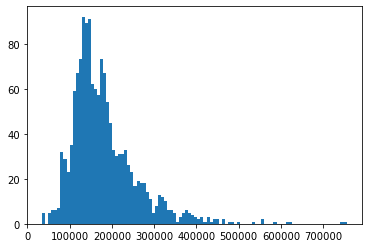

In [16]:
# 频率图观察房价分布

_ = plt.hist(train.SalePrice, bins=100)

房价分布区间很广，且存在部分房源价格极高，可以考虑先对房价进行对数化处理，让分布更接近正态分布。

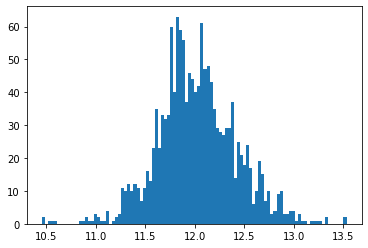

In [17]:
train['SalePrice_Log'] = np.log(train['SalePrice'])
_ = plt.hist(train.SalePrice_Log, bins=100)

In [18]:
#因数值型数据和非数值型后续处理有一点差别，我们先获得所有数值型属性列名和非数值型属性列名
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  39
Number of Categorical features:  43


In [19]:
print(train[numerical_feats].columns)
print("*"*100)
print(train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'SalePrice_Log'],
      dtype='object')
****************************************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterC

# Matplotlib

Matplotlib 提供了一个套面向绘图对象编程的 API 接口，能够很轻松地实现各种图像的绘制,如:柱状图：bar(),直方图：hist(),散点图：scatter(),饼图:pie()

使用plot绘图要素，横坐标数据，纵坐标数据，线格式,标记字符以及常用字符和颜色如下，

|标记字符（marker）|描述|        |风格字符(linestyle)|描述|     | 颜色字符(color)|	颜色|
  |:--:|:--:|          |:--:|:--:|        |:--:|:--:|
 |'.'|点标记|            |'-'|实线样式|      |'b'|蓝色|
|','|像素标记|           |'--'|	短横线样式|    |  'g'|绿色|
|'o'|圆标记|            |'-.'|	点划线样式|      |'r'|红色|
|'v'|倒三角标记|          |':'|虚线样式|     | 'c'|青色|
 | | |                 | | |            |'m'|品红色|
| | |                   | | |            | 'y'|黄色|
  | | |                  | | |               | 'k'|黑色|
 | | |                   | | |            | 'w'|白色|   
  

 


因数据预测的目标值是房屋价格，所以我们先使用plot看看房屋价格的分布情况

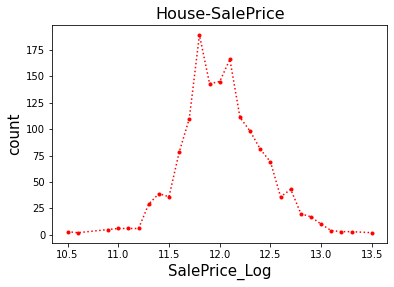

In [20]:
plt.title("House-SalePrice", fontsize=16) # 设置标题
plt.xlabel("SalePrice_Log", fontsize=15) # 横坐标
plt.ylabel("count", fontsize=15) # 纵坐标
plt.plot(data.index, data.values, linestyle=':',marker=".",color='r') #":"表示虚线样式,"."表示点标记,"r"表示线为红色
plt.show()

有时我们希望一个图可以显示多个属性的状态时，我们需要使用matplitlob的子图功能，
```python
fig , ax = plt.subplots(nrows, ncols)  # nrows,ncols 表示子图所占的行数、列数
```
当nrows,ncols都等于2时，ax子图排列如下图所示
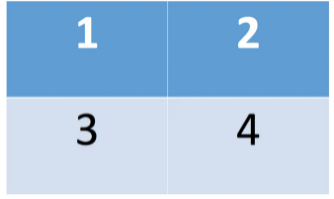

[[<AxesSubplot:title={'center':'1'}> <AxesSubplot:title={'center':'2'}>]
 [<AxesSubplot:title={'center':'3'}> <AxesSubplot:title={'center':'4'}>]]


<Figure size 576x576 with 0 Axes>

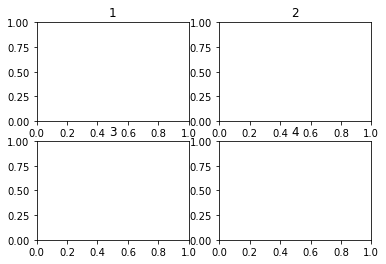

In [21]:
plt.figure(figsize = (8, 8)) # 指定整体图片大小；
fig, ax = plt.subplots(2, 2) # fig是图形对象，ax表示子图轴数组
ax[0][0].set_title(1)
ax[0][1].set_title(2)
ax[1][0].set_title(3)
ax[1][1].set_title(4)
print(ax) # 子图顺序和示例图顺序一致

Index(['MSZoning', 'Street', 'Alley', 'LotShape'], dtype='object')


<Figure size 576x576 with 0 Axes>

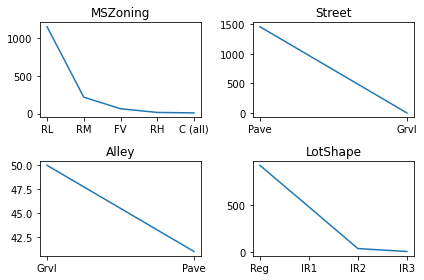

In [22]:
plt.figure(figsize = (8, 8))
fig, ax = plt.subplots(2, 2) 
print(categorical_feats[:4]) # 输出对应属性值列名
for row in range(2):
     for col in range(2):
        data = train[categorical_feats[row*2+col]].value_counts() # 2代表列图个数
        ax[row][col].plot(data.index, data.values)
        ax[row][col].set_title(f'{categorical_feats[row*2+col]}')
fig.tight_layout() # 自动保持子图之间的正确间距。
plt.show()

## 直方图  

直方图是频数直方图的简称，描述数据在各个取值出现的频次，纵轴为频次，横轴为取值。

|参数|描述|
|:--:|:--:|
|x	|必填参数，数组或者数组序列。|
|bins	|可选参数，整数或者序列，bins 表示每一个间隔的边缘（起点和终点）默认会生成10个间隔。|
|range	|指定全局间隔的下限与上限值 (min,max)，元组类型，默认值为 None。|
|density|如果为 True，返回概率密度直方图；默认为 False，返回相应区间元素的个数的直方图。|
|histtype|要绘制的直方图类型，默认值为“bar”，可选值有 barstacked(堆叠条形图)、step(未填充的阶梯图)、stepfilled(已填充的阶梯图)。|

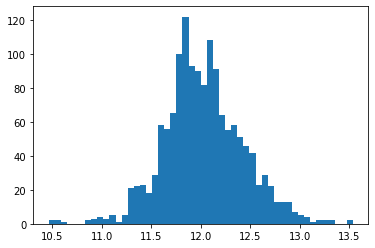

In [24]:
plt.hist(x = train['SalePrice_Log'], bins=50)
plt.show()

## 柱状图

柱状图是一种用矩形柱来表示数据分类的图表，它的高度与其所表示的数值成正比关系。柱状图显示了不同类别之间的比较关系

|参数|描述|
|:--:|:--:|
|x|	一个标量序列，代表柱状图的x坐标，默认x取值是每个柱状图所在的中点位置，或者也可以是柱状图左侧边缘位置。|
|height	|一个标量或者是标量序列，代表柱状图的高度。|
|width	|可选参数，标量或类数组，柱状图的默认宽度值为 0.8。|
|bottom|	可选参数，标量或类数组，柱状图的y坐标默认为None。|
|algin	|有两个可选项 {"center","edge"}，默认为 'center'，该参数决定 x 值位于柱状图的位置。|

<BarContainer object of 5 artists>

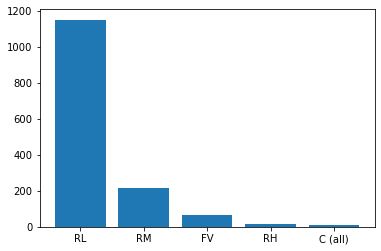

In [25]:
data = train['MSZoning'].value_counts() 
plt.bar(x = data.index, height = data.values) 

## 散点图

散点图用于在水平轴和垂直轴上绘制数据点，它表示了因变量随自变量变化的趋势，

|参数|描述|
|:--:|:--:|
|x, y |散点的坐标|
|s |散点的面积|
|c|散点的颜色（默认值为蓝色，'b'，其余颜色同plt.plot( )）|
|marker |散点样式（默认值为实心圆，'o'，其余样式同plt.plot( )）|
|alpha |散点透明度（[0, 1]之间的数，0表示完全透明，1则表示完全不透明）|
|linewidths |点的边缘线宽|
|edgecolors |散点的边缘颜色|

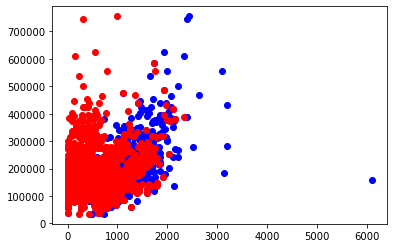

In [26]:
plt.scatter(x = train.TotalBsmtSF, y = train.SalePrice, c='b')
plt.scatter(x = train.BsmtUnfSF, y = train.SalePrice, c='r') # 绘制多个属性到一个散点图

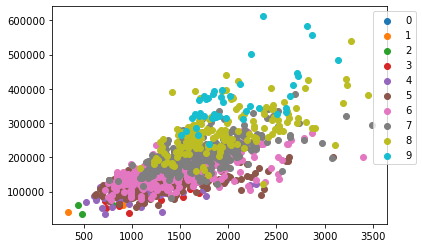

In [27]:
# 对一个属性内不同值用不同的颜色显示
plt.figure(figsize = (6,4))
for val in range(10):
    indeX = train.OverallQual == val
    plt.scatter(x = train.GrLivArea.loc[indeX], y = train.SalePrice.loc[indeX]) # 
plt.legend(bbox_to_anchor = [1.1, 1],labels=range(10)) # 显示图例，说明颜色对应的类别

## 饼状图

饼状图显示一个数据系列中各项目的占项目总和的百分比。

|参数|描述|
|:--:|:--:|
|x	|数组序列，数组元素对应扇形区域的数量大小。|
|explode|突出显示，设置每一块分割出来的间隙大小|
|labels|	列表字符串序列，为每个扇形区域备注一个标签名字。|
|color	|为每个扇形区域设置颜色，默认按照颜色周期自动设置。|
|autopct|	格式化字符串"fmt%pct"，使用百分比的格式设置每个扇形区的标签，并将其放置在扇形区内。|

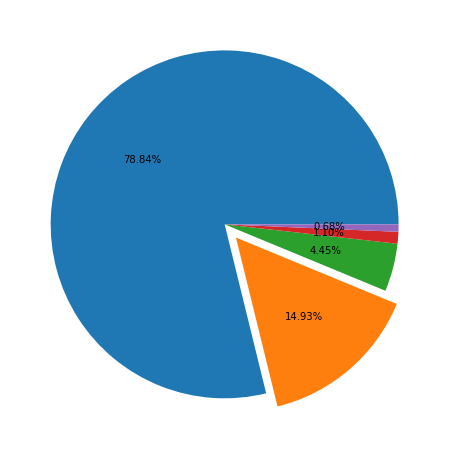

In [28]:
plt.figure(figsize=(8,8))
data = train['MSZoning'].value_counts()
explode = (0, 0.1, 0, 0, 0)
plt.pie(x = data,explode = explode, autopct = '%1.2f%%')
plt.show()

# Pandas绘图

Pandas在matplotlib基础上封装了一个简易的绘图函数,可以传入DataFrame或者Series类型数据，使得我们在数据处理过程中方便可视化查看结果

## Series类型数据绘图


<AxesSubplot:>

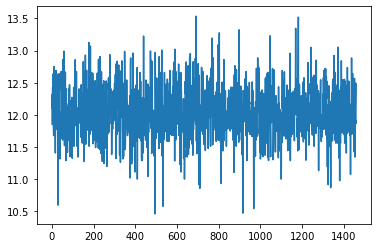

In [29]:
train['SalePrice_Log'].plot()

<AxesSubplot:>

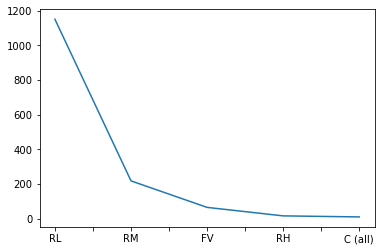

In [30]:
# 统计某一属性值后显示
train['MSZoning'].value_counts().plot()

<AxesSubplot:>

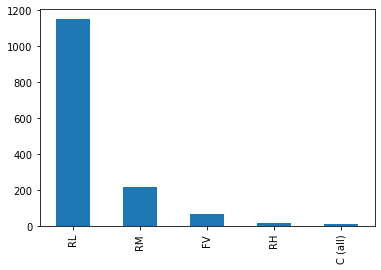

In [31]:
# 可以通过关键字kind传递常用的绘图方式，也可以直接在plot后使用常用的方法
train['MSZoning'].value_counts().plot(kind="bar") # 柱状图

<AxesSubplot:ylabel='Frequency'>

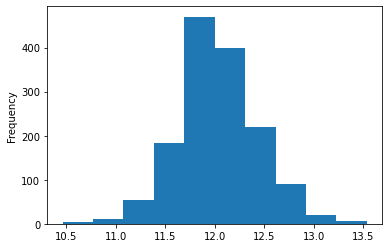

In [32]:
train['SalePrice_Log'].plot.hist() # 直方图

## DataFrame类型数据绘图



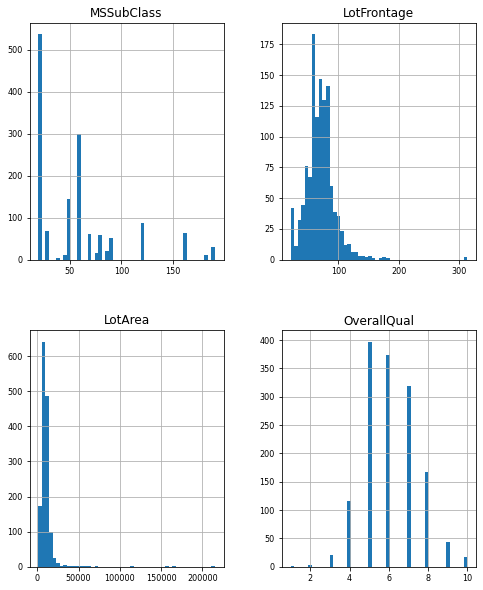

In [33]:
# 使用部分数据直接进行绘图
train_d = train.loc[:,numerical_feats[1:5]]
train_d.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

<AxesSubplot:ylabel='Frequency'>

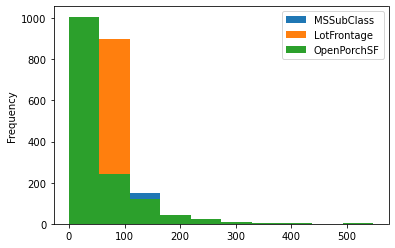

In [34]:
# 使用plot将多列数据绘制在一个图上
train.loc[:,['MSSubClass','LotFrontage','OpenPorchSF']].plot.hist()

<AxesSubplot:>

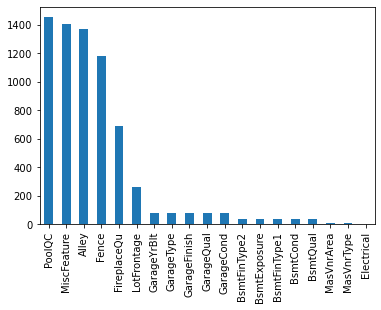

In [35]:
# 对属性值含有NaN的列进行统计使用柱状图显示
missing = train.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)# inplace=True
missing.plot.bar()

# seaborn

Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易,seaborn支持5种主题：
1. darkgrid（灰色网格）
2. whitegrid（白色网格）
3. dark（黑色）
4. white（白色）
5. ticks（十字叉

## seaborn常用图

### 直方图

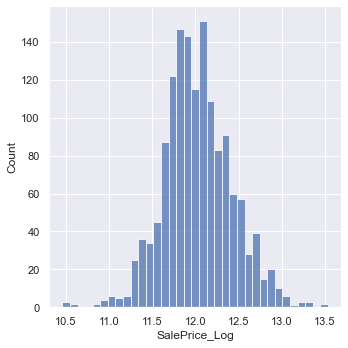

In [36]:
# displot显示直方图
sns.set(style = "darkgrid")
sns.displot(x = train['SalePrice_Log'])

### 核密度估计图
核密度估计图（kernel density plot）用于显示数据在X轴连续数据段内的分布状况。这种图表是直方图的变种，使用平滑曲线来绘制水平数值，从而得出更平滑的分布。

<AxesSubplot:xlabel='SalePrice_Log', ylabel='Density'>

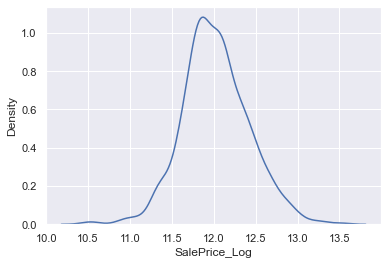

In [37]:
sns.kdeplot(x = train['SalePrice_Log'])

<AxesSubplot:ylabel='Density'>

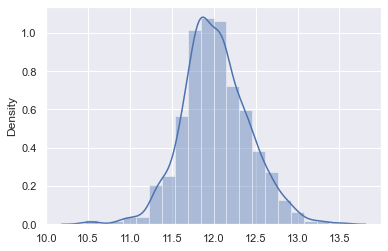

In [38]:
# distplot是直方图和和密度图的集合体
sns.distplot(x = train["SalePrice_Log"],bins=20, kde=True)

### 条形图

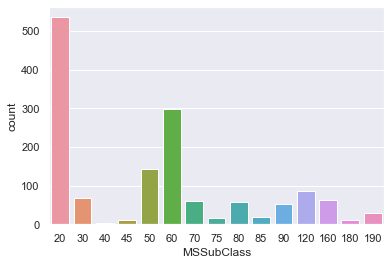

In [39]:
# 使用条形图查看某一个数值型数据的分布情况
ax = sns.countplot(x="MSSubClass", data = train)

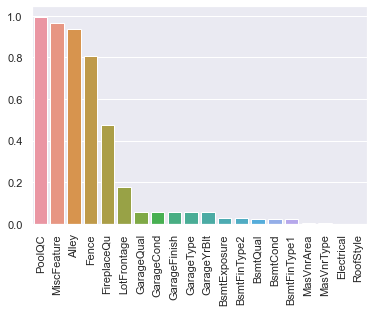

In [40]:
# 使用矩形图统计NaN在对应列所占比例
missing = train.isnull().mean()
missing = missing.sort_values(ascending=False)[:20]
# 以条形图显示NaN值在每个属性值所占比例
sns.barplot(x=missing.index,y=missing.values)
plt.xticks(rotation=90) # 将x坐标表示旋转90度
plt.show()

使用条形图查看某一属性时，矩形条的方式展示数据的点估值和置信区间，其中每个柱条的黑色的线条为误差线，表示数据误差范围。当误差线比较“长”时，一般要么是数据离散程度大，要么是数据样本少。

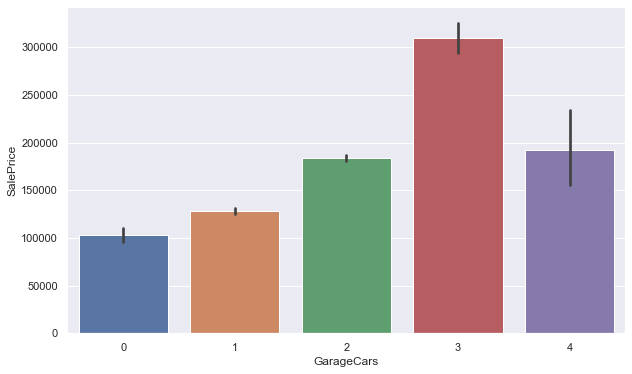

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='GarageCars',y = 'SalePrice',data=train)
plt.show()

### 箱线图
箱线图作用是展现与类别相关的数据分布状况,它能显示出一组数据的最大值、最小值、中位数、及上下四分位数
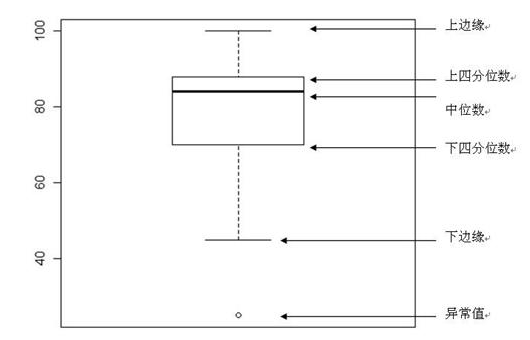

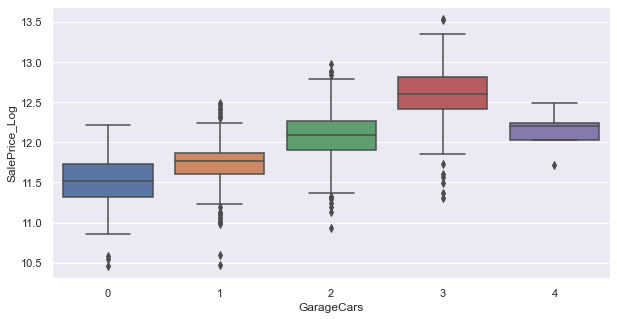

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'GarageCars',y = 'SalePrice_Log',data = train)
plt.show()

### 热力图

识别预测变量和目标变量相关性的方法

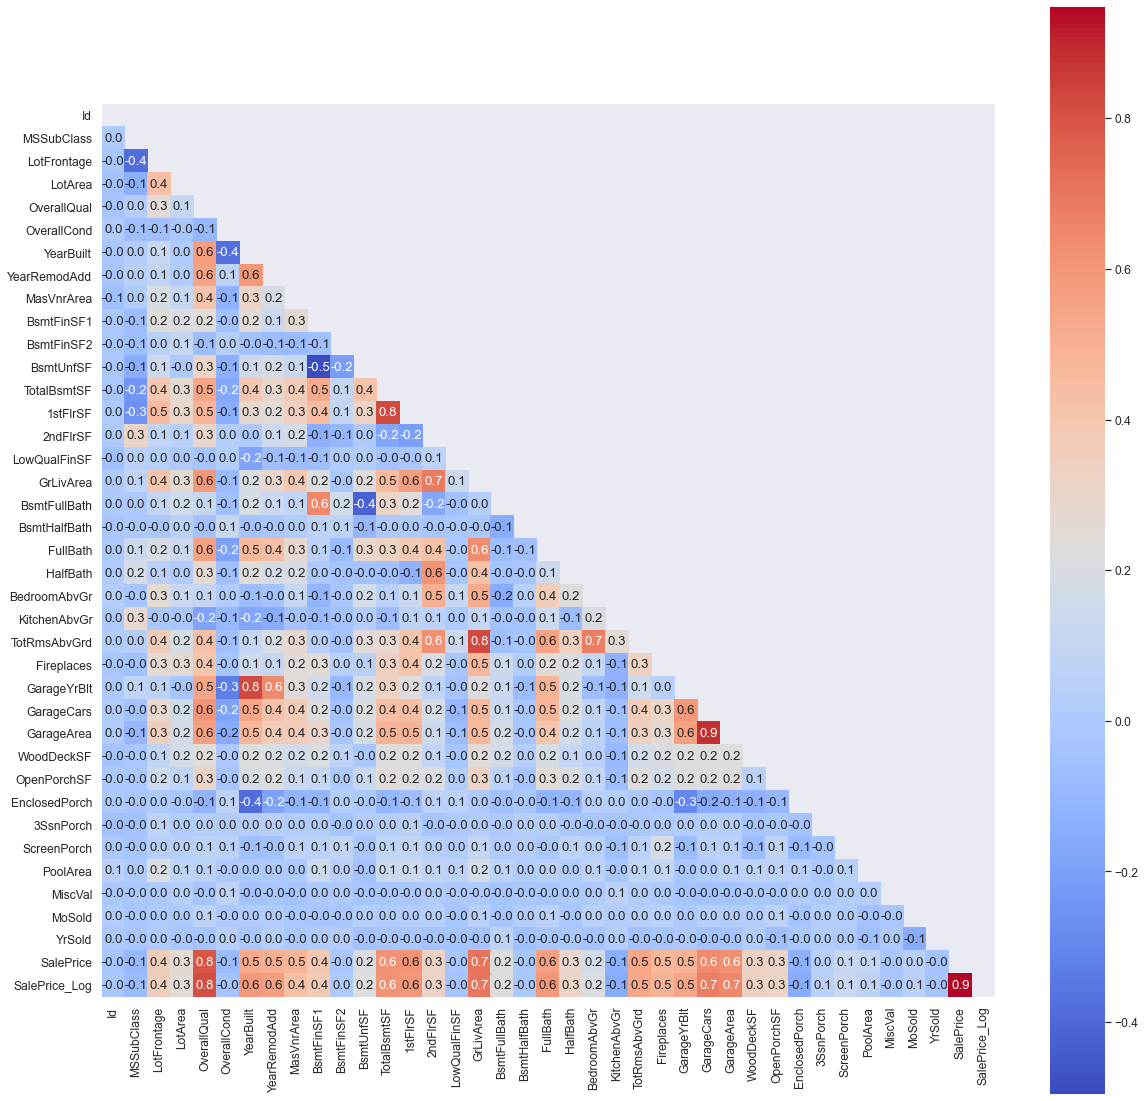

In [43]:
sns.set(font_scale=1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr()) # 返回协方差的上三角矩阵
plt.figure(figsize=(20, 20))
sns.heatmap(data = correlation_train,
            annot = True,
            fmt='.1f',# 注释格式
            cmap='coolwarm',# 颜色列表
            square=True,# 将每个单元格为方形
            mask=mask,
           )
plt.show()

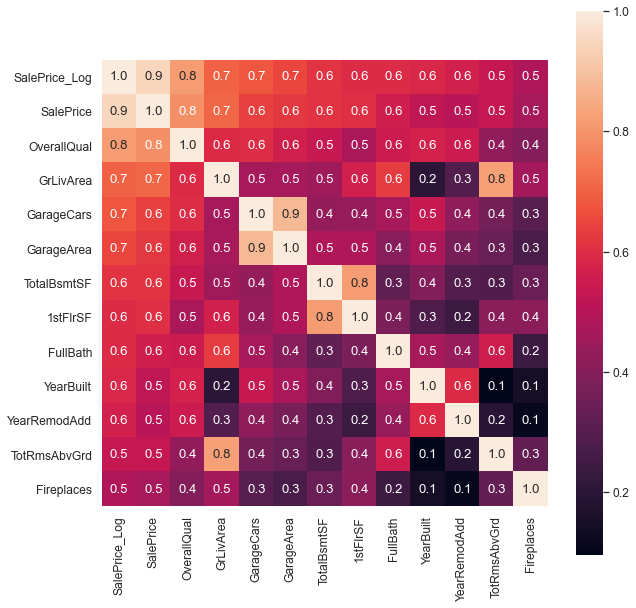

In [44]:
# 对数据的部分列进行热力图显示
plt.figure(figsize=(10, 10))
# corr_abs = train.corr().abs() 
# ser_corr = corr_abs.nlargest(len(numerical_feats), "SalePrice_Log")["SalePrice_Log"]
# cols = ser_corr[ser_corr.values > 0.43].index
cols = ['SalePrice_Log', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces']
cm = train[cols].corr()
sns.heatmap(data = cm, annot=True, square=True, fmt='.1f')
plt.show()

## jointplot(双变量关系组图)

用双变量图和单变量图绘制一个由两个变量组成的图。

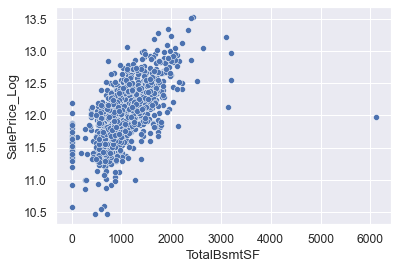

<Figure size 288x216 with 0 Axes>

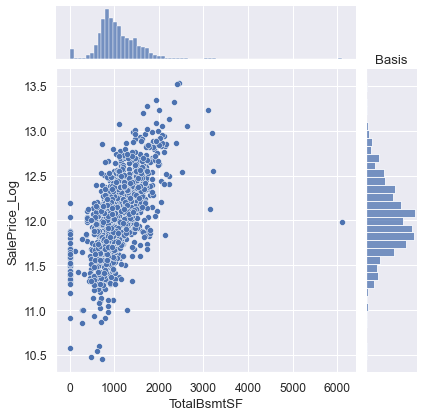

In [45]:
# 使用sns散点图，描述变量和房价之间的关系
sns.scatterplot(x = train['TotalBsmtSF'],y = train['SalePrice_Log'])
# 使用双变量图，描述变量的分布图和变量相关的散点图组合在一起
plt.figure(figsize = (4, 3))
sns.jointplot(x = train.TotalBsmtSF, y = train.SalePrice_Log)
plt.xlabel('GrLvArea')
plt.ylabel('SalePrice')
plt.title('Basis')
plt.show()

## (lmplot,regplot)回归图

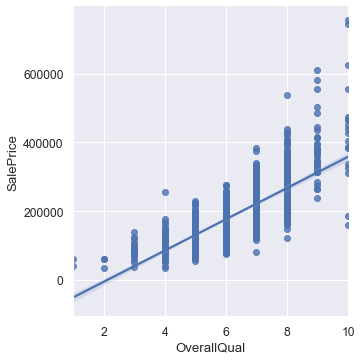

In [46]:
# 在描绘散点图的同时，输出两个变量之间的线性关系
sns.lmplot(x = 'OverallQual', y = 'SalePrice', data = train)

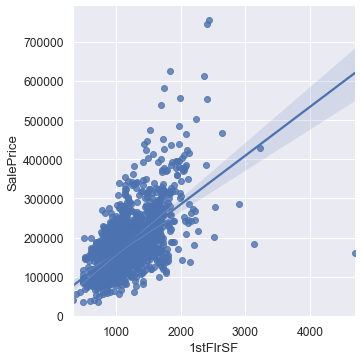

In [47]:
sns.lmplot(x = '1stFlrSF', y = 'SalePrice', data = train) # hue='OverallQual'

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

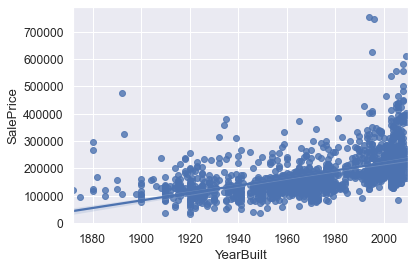

In [48]:
# 可以是字符串也可以是具体数值
sns.regplot(x = 'YearBuilt', y = 'SalePrice', data = train)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

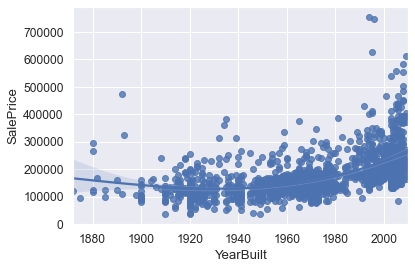

In [49]:
# order大于 1，使用numpy.polyfit来估计多项式回归,常用于进行曲线拟合的函数
sns.regplot(x = train['YearBuilt'], y = train['SalePrice'], order = 3)

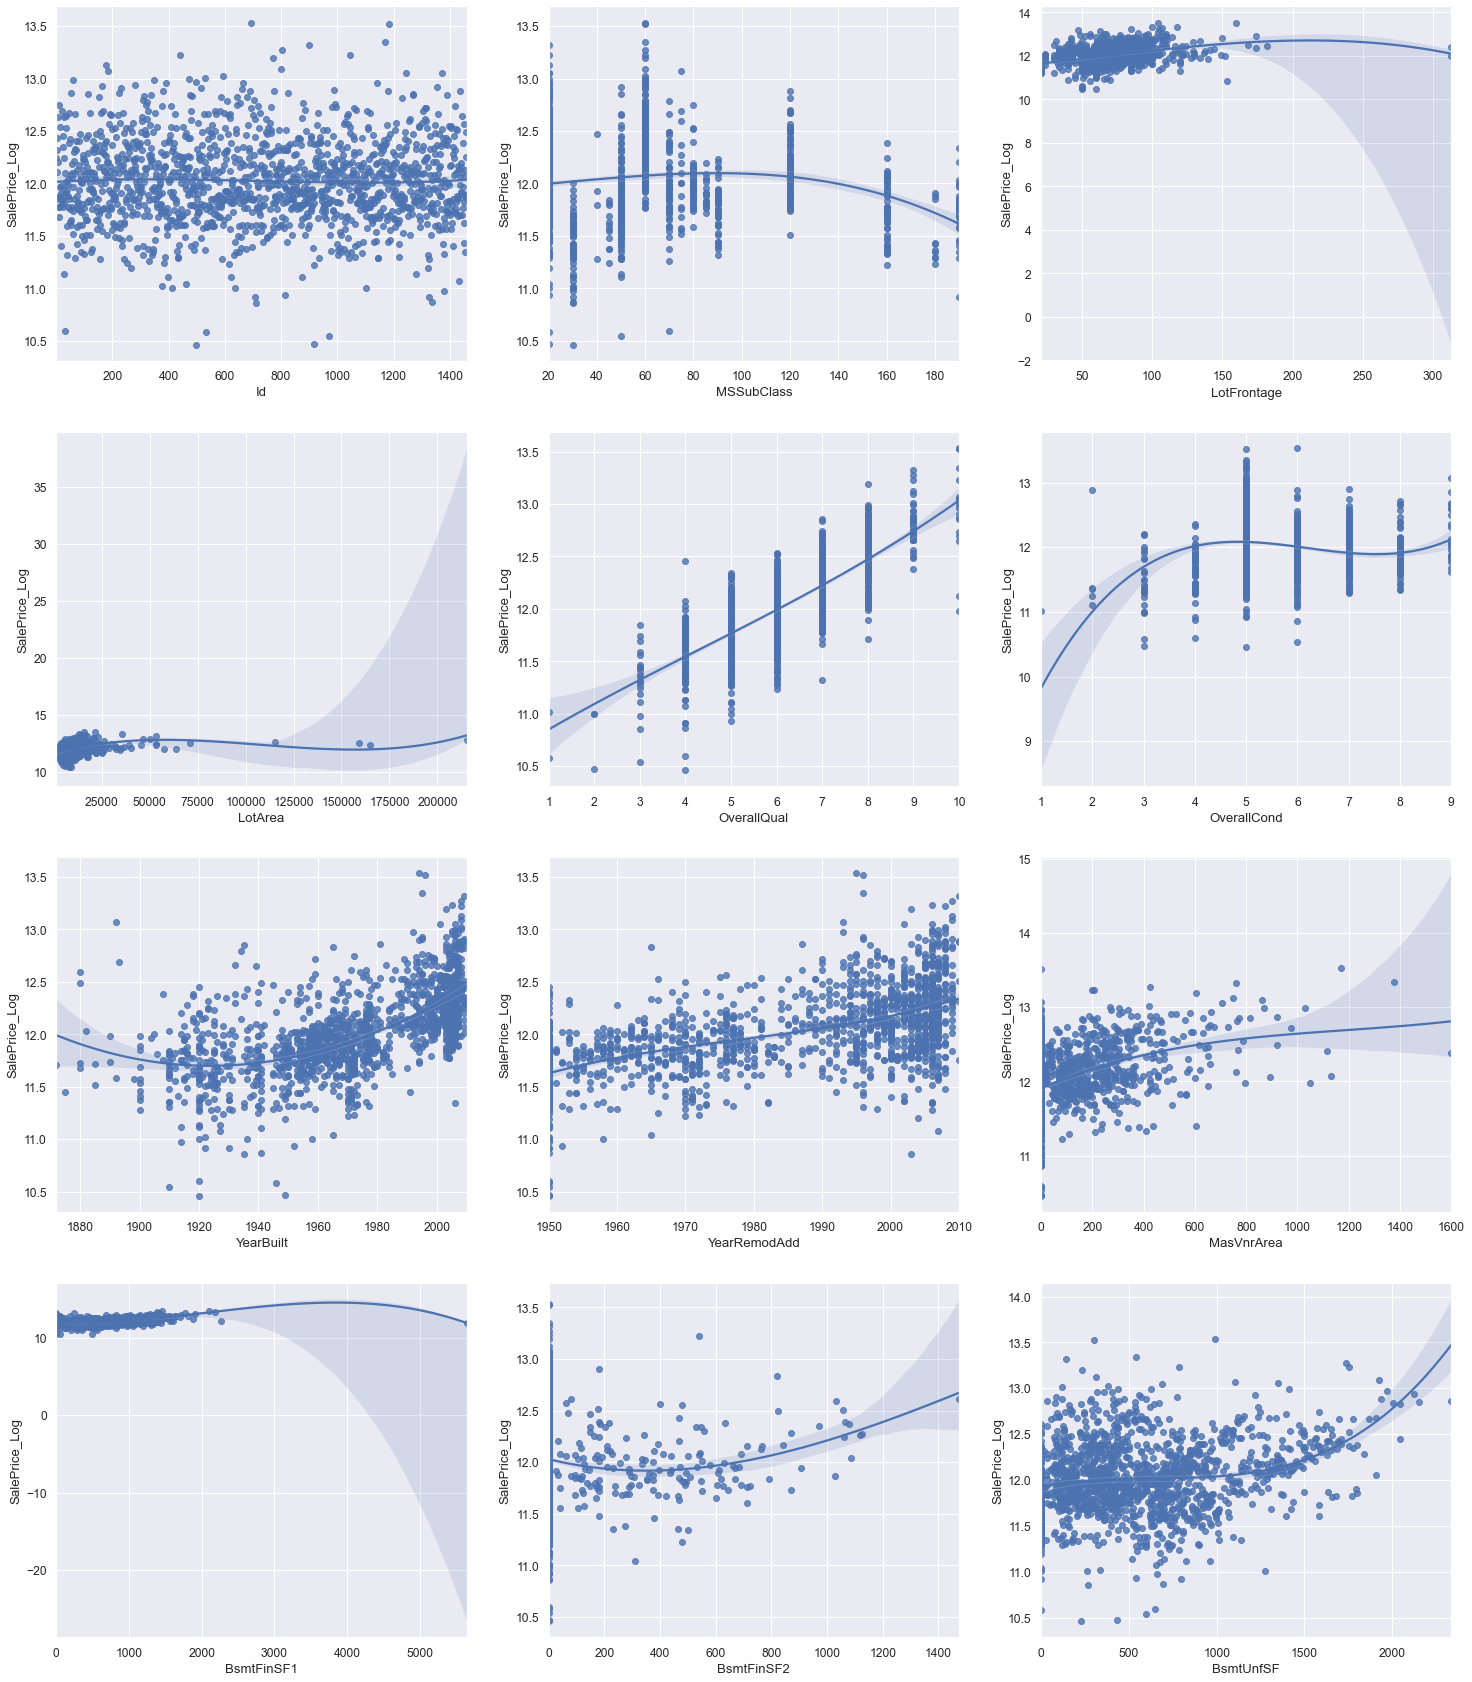

In [50]:
# 使用for循环对属性遍历
fig, axes = plt.subplots(4, 3, figsize=(25, 30))
axes = axes.flatten()
for columns, j in zip(train.select_dtypes(include=['number']).columns[:13], axes):
    sns.regplot(x=columns, y="SalePrice_Log", data=train,ax=j, order=3)

## pairplot(成对关系组图)

在数据集中绘制成对关系,用来展示两个特征之间的关系,默认情况下，此函数将创建一个 Axes 网络，以便data中的每个变量将在 y 轴上共享一行，并在 x 轴上共享一列,以此让对角线为各个属性直方图,非对角线是不同属性之间的相关图

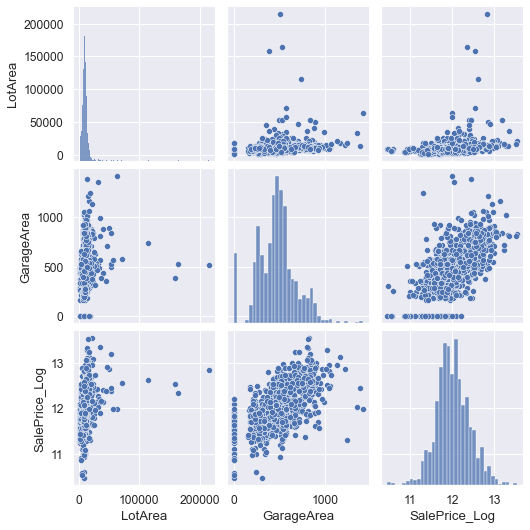

In [52]:
train_pair = train.loc[:,["LotArea", "GarageArea", "SalePrice_Log"]]
sns.pairplot(data = train_pair)

# 作业1（阅读理解）

Titanic的数据挖掘案例为什么会是数据科学新手学习的经典案例，我们通过阅读来了解一下：
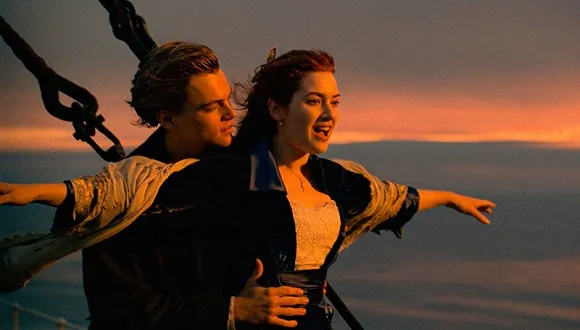

**背景介绍**：

泰坦尼克号的沉没事件相信大家已经耳熟能详，1912年4月15日，在处女航期间，被大家认为“永不沉没”的皇家邮轮泰坦尼克号在与冰山相撞后沉没。不幸的是，船上没有足够的救生艇，导致2224名乘客和船员中的1502人死亡。虽然幸存有运气因素，但似乎有些人有更大概率活下来。在这个[竞赛案例](https://www.kaggle.com/c/titanic)中，需要我们进行数据挖掘并建立一个预测模型回答：“什么样的人更有可能幸存？” 

**阅读理解**：

1. 阅读[Titanic baseline](https://zhuanlan.zhihu.com/p/27550334)，从有趣的数据探索中感受建模的流程；
1. 阅读[Titanic 特征工程与模型调优](https://zhuanlan.zhihu.com/p/28795160)，一探神秘的特征工程与模型调优，原来实践起来并不复杂。

**温馨提示:**

当前阶段只需要阅读理解，不用代码实践，可以等掌握各经典机器学习算法后再来实践。

# 作业2（代码实践）

下载Kaggle[房价预测竞赛数据](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)，选取5个数值型特征和5个类别型特征，分析其与房价的关系及特征间的关系，并规范在notebook中记录下来。